# OVARY ORACLE

## BUSINESS UNDERSTANDING

> PCOS a significant public health problem and is one of the commonest hormonal disturbances affecting women of reproductive age. The condition affects an estimated 8–13% of women of reproductive age, and up to 70% of cases are undiagnosed.

The prevalence of PCOS is higher among some ethnicities and these groups often experience more complications, in particular related to metabolic problems.

Polycystic ovary syndrome (PCOS) is a common hormonal condition that affects women of reproductive age. It usually starts during adolescence, but symptoms may fluctuate over time.

PCOS can cause hormonal imbalances, irregular periods, excess androgen levels and cysts in the ovaries. Irregular periods, usually with a lack of ovulation, can make it difficult to become pregnant. PCOS is a leading cause of infertility.

## Defining the metric of success

>The model should have an accuracy of at least 80%

## Recording the experimental design

- Research Question: Can one predict whether people has PCOS using information they shared about their backgrounds, opinions, and health behaviors?
- The dataset was collected from 10 different hospitals in Kerala,India.
- The variables: The columns in the main data set include:'Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'
- Model evaluation:The metrics used to evaluate the model’s performance are: accuracy,precision,recall,f-1 score.
- Conclusions and recommendations

## DATA UNDERSTANDING

> The dataset was collected from 10 different hospitals in Kerala,India.
- The variables: 
The columns in the main data set include:
       'Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'

In [13]:
#import relevant libraries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from flask import Flask, request, jsonify
from sklearn.model_selection import GridSearchCV


%matplotlib inline


In [14]:
#load the pcos without infertility data set
df = pd.read_excel("/Users/lucillewanjiku/Documents/projects/Ovary-oracle/Ovary-oracle/data/PCOS_data_without_infertility.xlsx",sheet_name="Full_new")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [15]:
#check all the columns 
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [16]:
#check for the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [17]:
#getting descriptive statistics for df-1
df.describe(include="all")

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915,NaN
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381,NaN
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000,NaN
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000,NaN
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000,NaN


In [18]:
#determining the number of records in our dataset
df.shape

(541, 45)

> The shape indicates that the data has 541 observations and 45 features

## External Data Source Validation

## Data pre-processing

In [19]:
#checking for null values 
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

> The final column has more than 500 missing values

In [20]:
#checking for duplicates 
df.duplicated().sum()

0

> There are no duplicates in the data set 

In [21]:
df.shape

(541, 45)

In [22]:
df['Cycle(R/I)'].max()

5

In [23]:
#dropping the unused column
df = df.drop(['Unnamed: 44'],axis=1)

In [24]:
#listing column names
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [25]:
#renaming columns
df.rename(columns = {' Age (yrs)':'Age'}, inplace = True)
df.rename(columns = {'Weight (Kg)':'Weight'}, inplace = True)

In [26]:
#Converting object data type to numeric type
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce") #converting object datatypeTonumeric

In [27]:
#trimming column names where there are extra spaces at start and end
df = df.rename(columns=lambda x: x.strip()) 

In [28]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age', 'Weight',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

## Exploratory Data Analysis

### Univariate Analysis

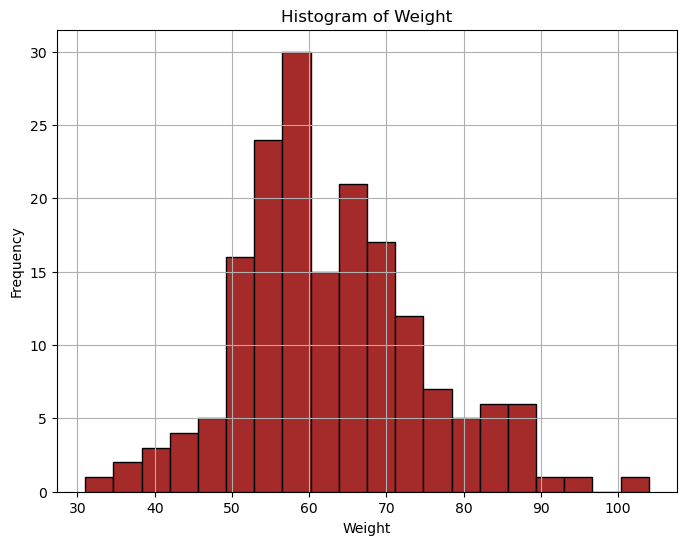

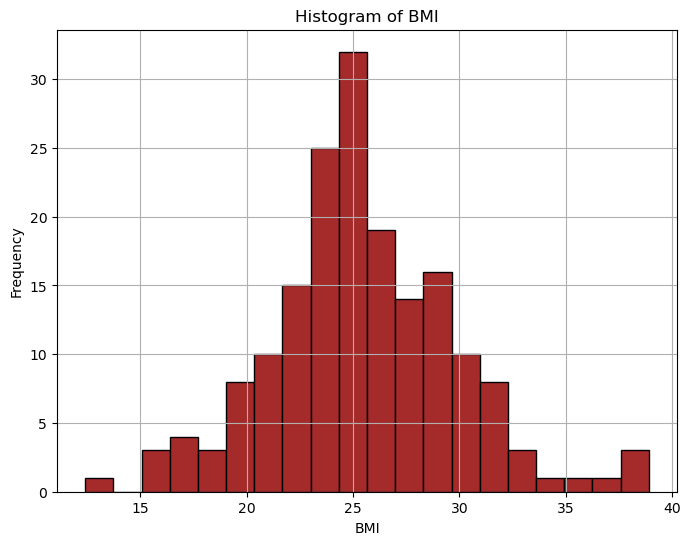

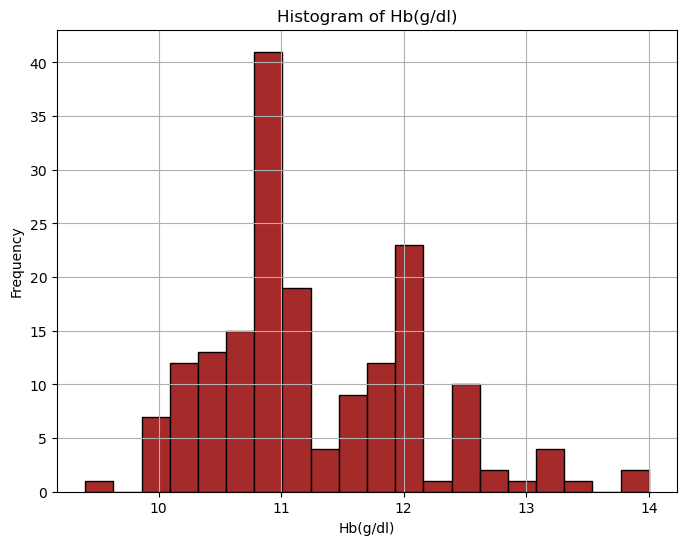

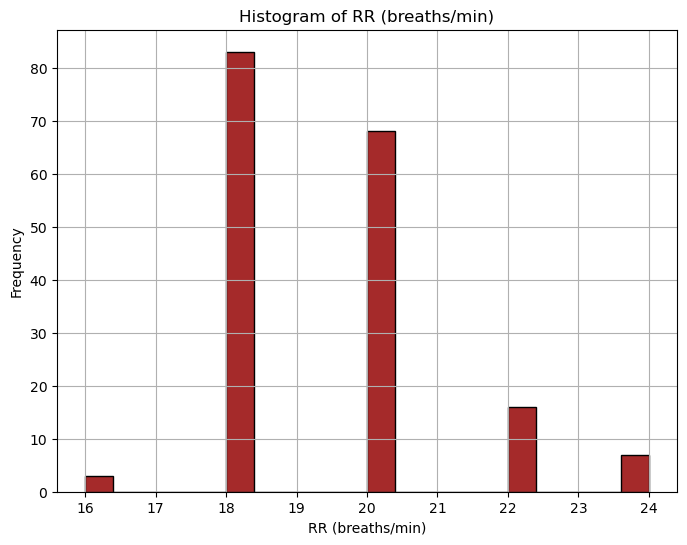

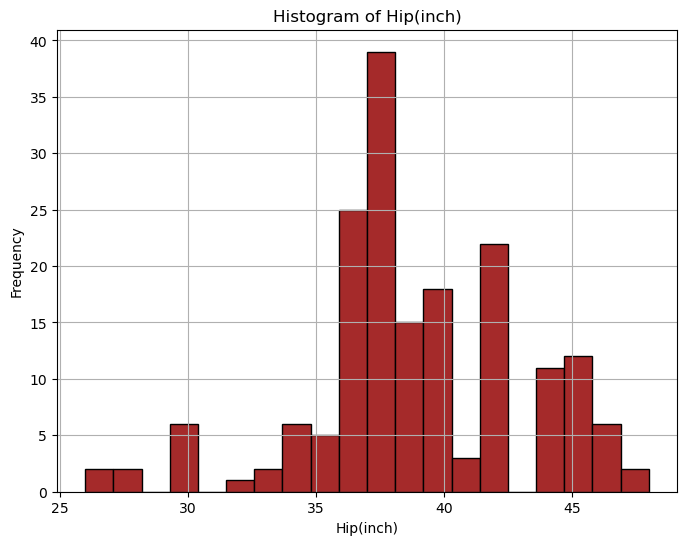

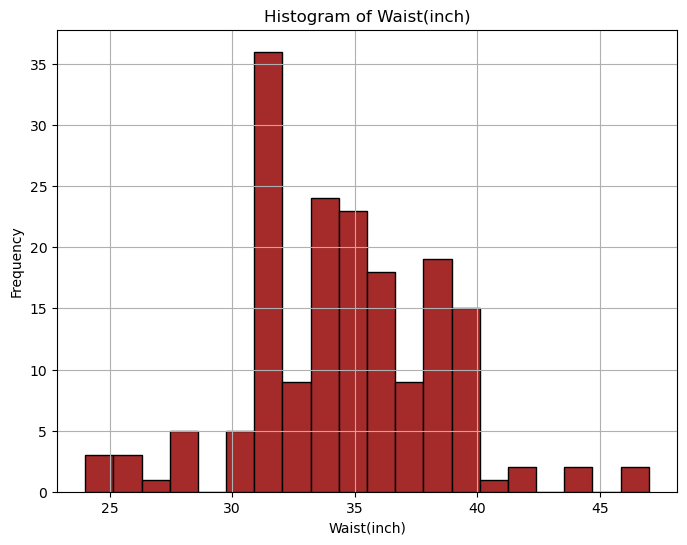

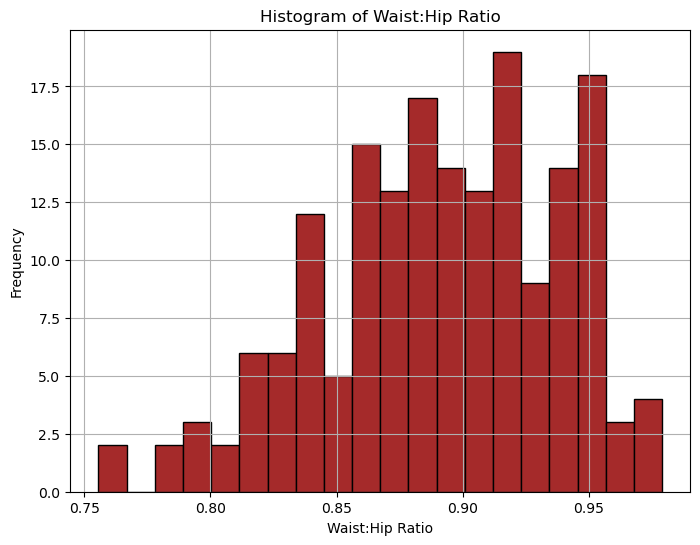

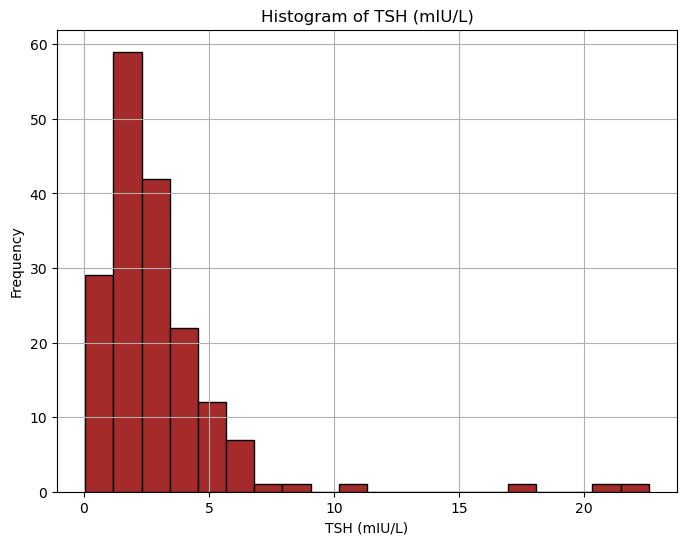

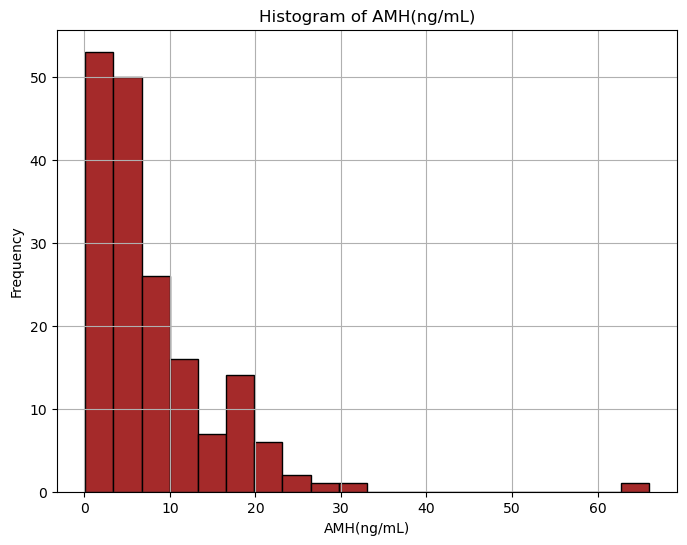

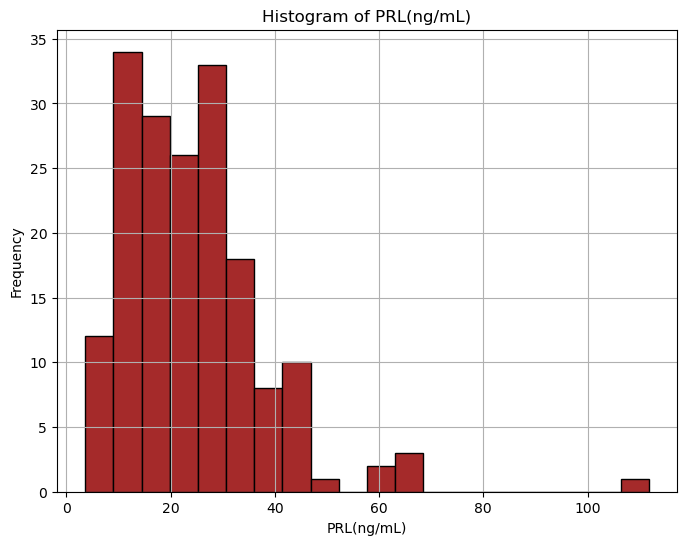

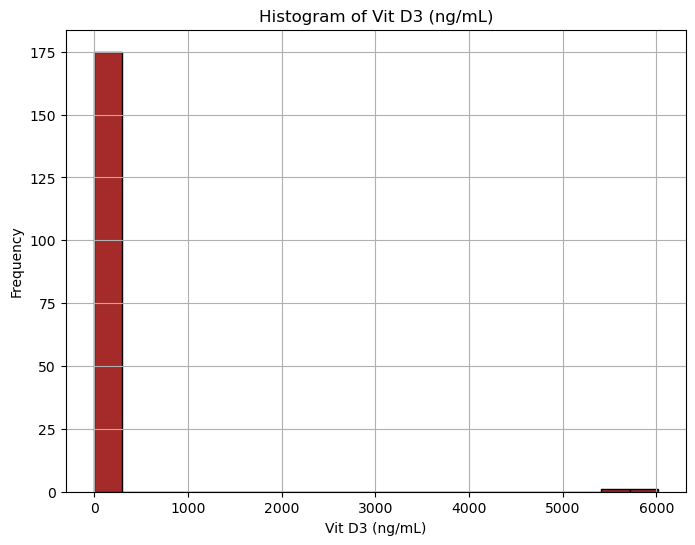

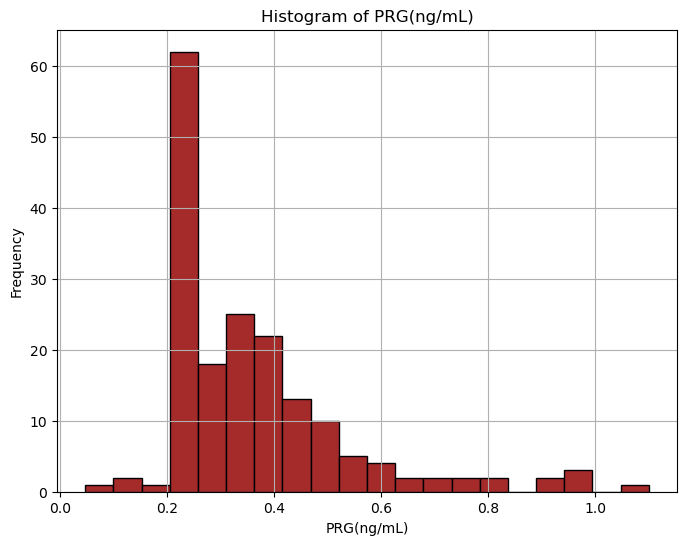

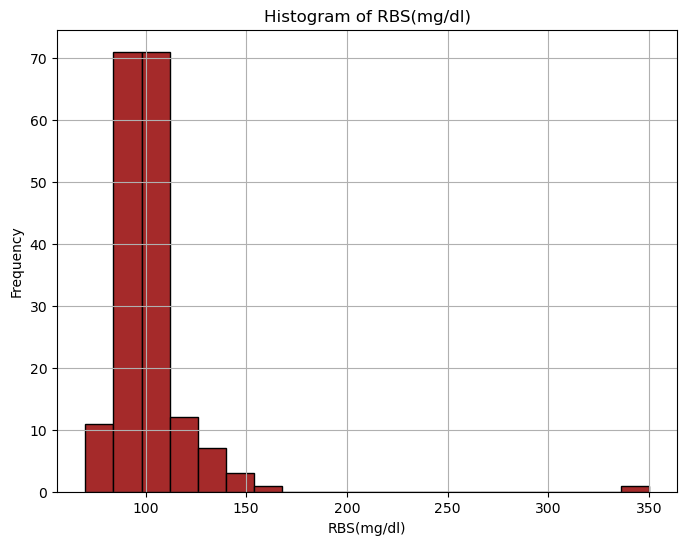

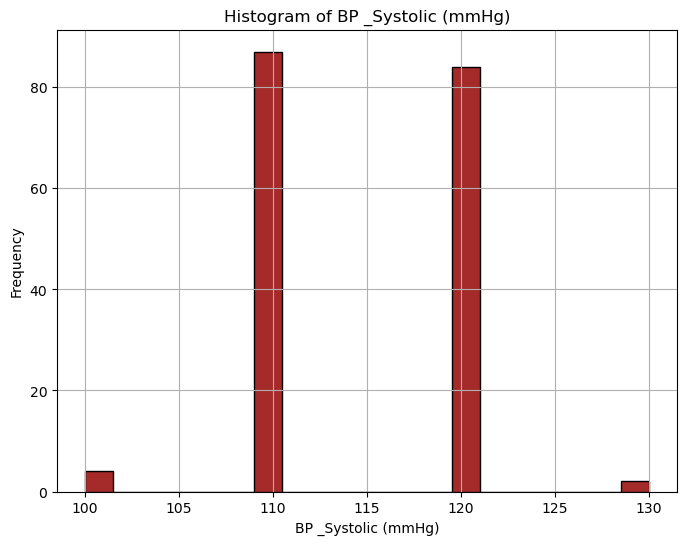

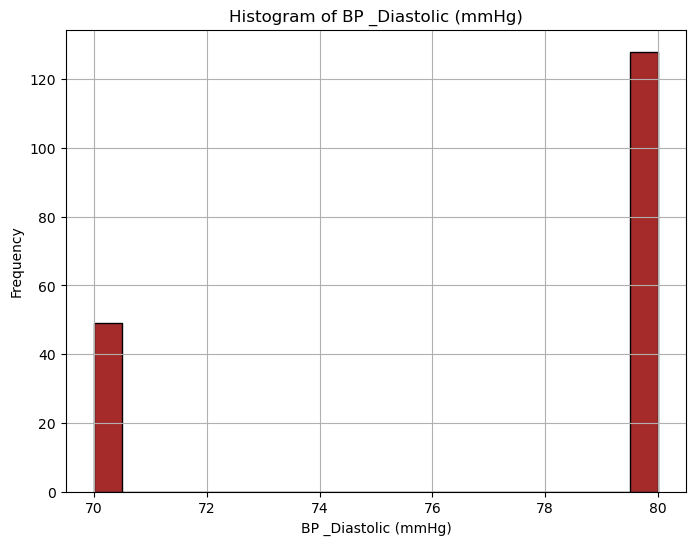

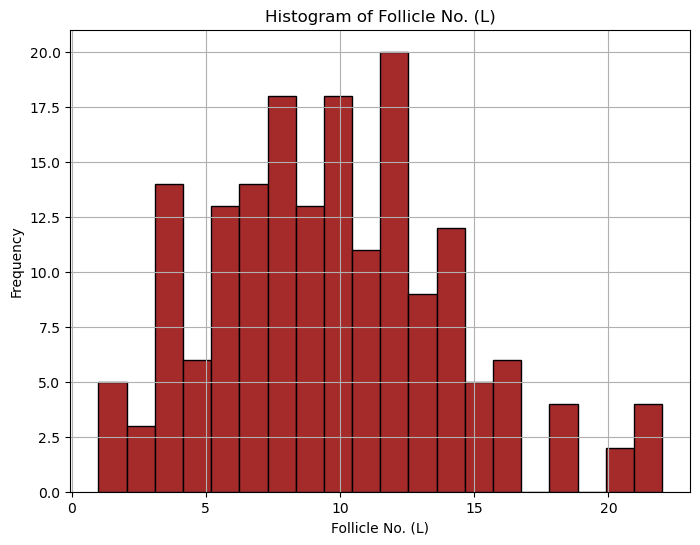

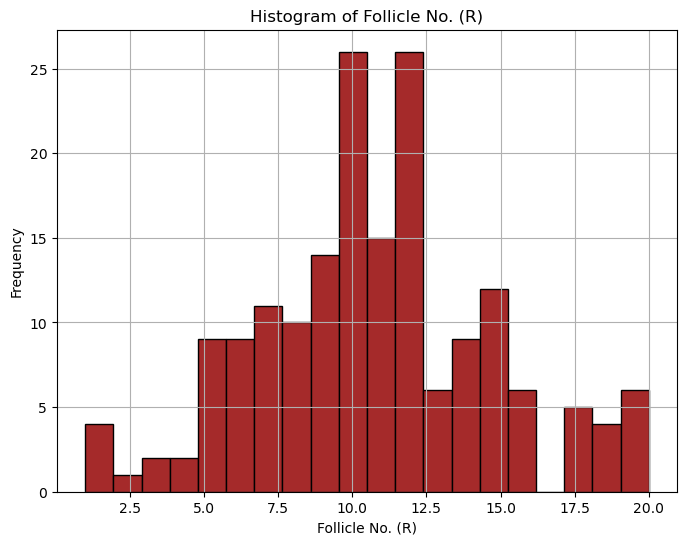

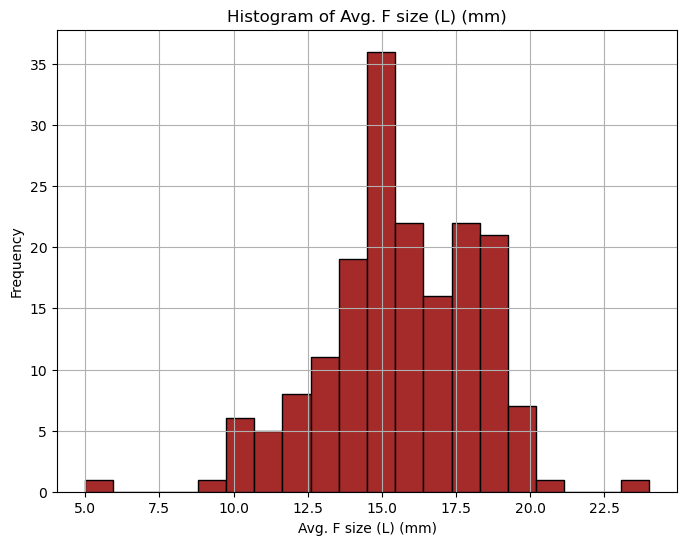

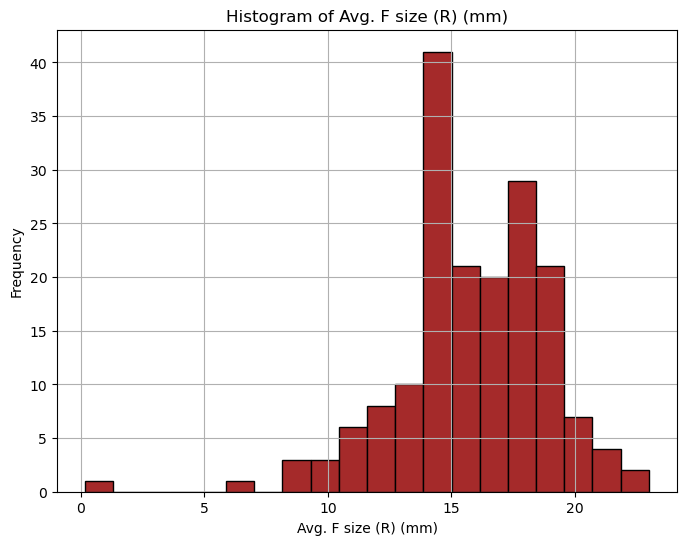

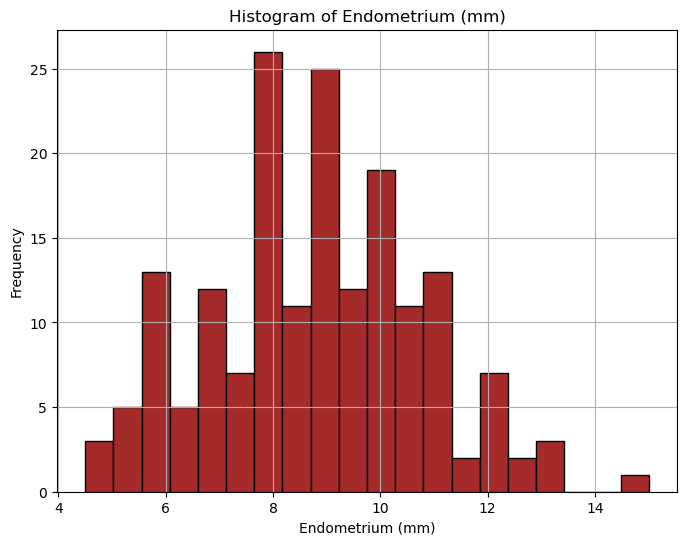

In [29]:
# List of numerical attributes for distribution analysis
numerical_attributes = ['Weight', 'BMI', 'Hb(g/dl)','RR (breaths/min)',
                        'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
                        'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
                        'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
                        'Endometrium (mm)']
df_pcos = df[df['PCOS (Y/N)']==1]
# Create histograms for each numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(df_pcos[attribute], bins=20, color='brown', edgecolor='black')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Multivariate Analysis

In [30]:
# Define age group bins and labels
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
df['Age Group'] = pd.cut(df['Age'],bins = age_groups,labels = age_labels)

In [31]:
# Categorize the 'Age (yrs)' column into age groups
age_group_counts = df.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)

pandas.core.frame.DataFrame

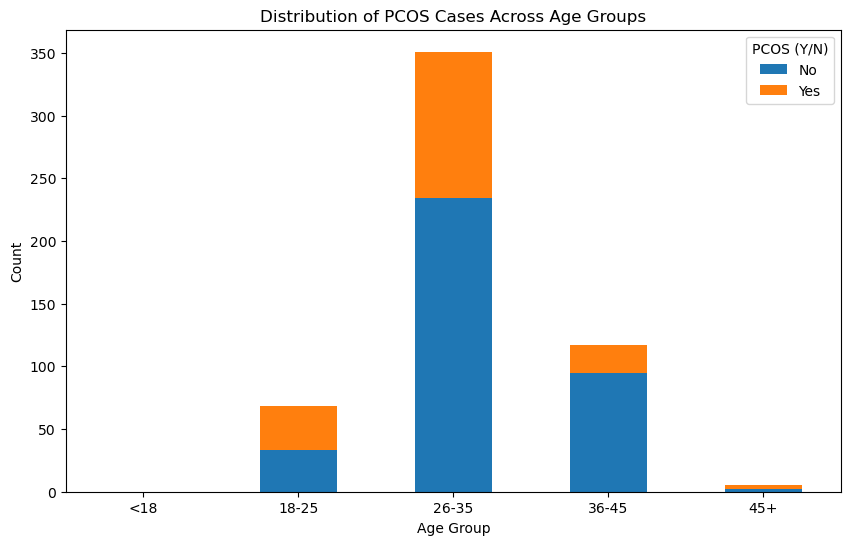

In [32]:
#correlation between age and getting PCOS
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

> People from the age group of 26-35 are the ones mostly affected with PCOS

## Implementing the solution

### Correlations

In [33]:
correlation_with_target = df.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)
print(correlation_with_target)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight                    0.211938
BMI                       0.199534
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
Age                       0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.112897
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.    

/var/folders/vj/c98sfxhn1yjds29gk6q7_q_r0000gn/T/ipykernel_4592/2929675668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)


In [34]:
top_10_features = correlation_with_target[0:11]
print(top_10_features)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.377933
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.263863
Weight                  0.211938
Name: PCOS (Y/N), dtype: float64


In [35]:
df_new = df[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)','hair growth(Y/N)','Weight gain(Y/N)','Cycle(R/I)','Fast food (Y/N)','Pimples(Y/N)','AMH(ng/mL)','Weight']]

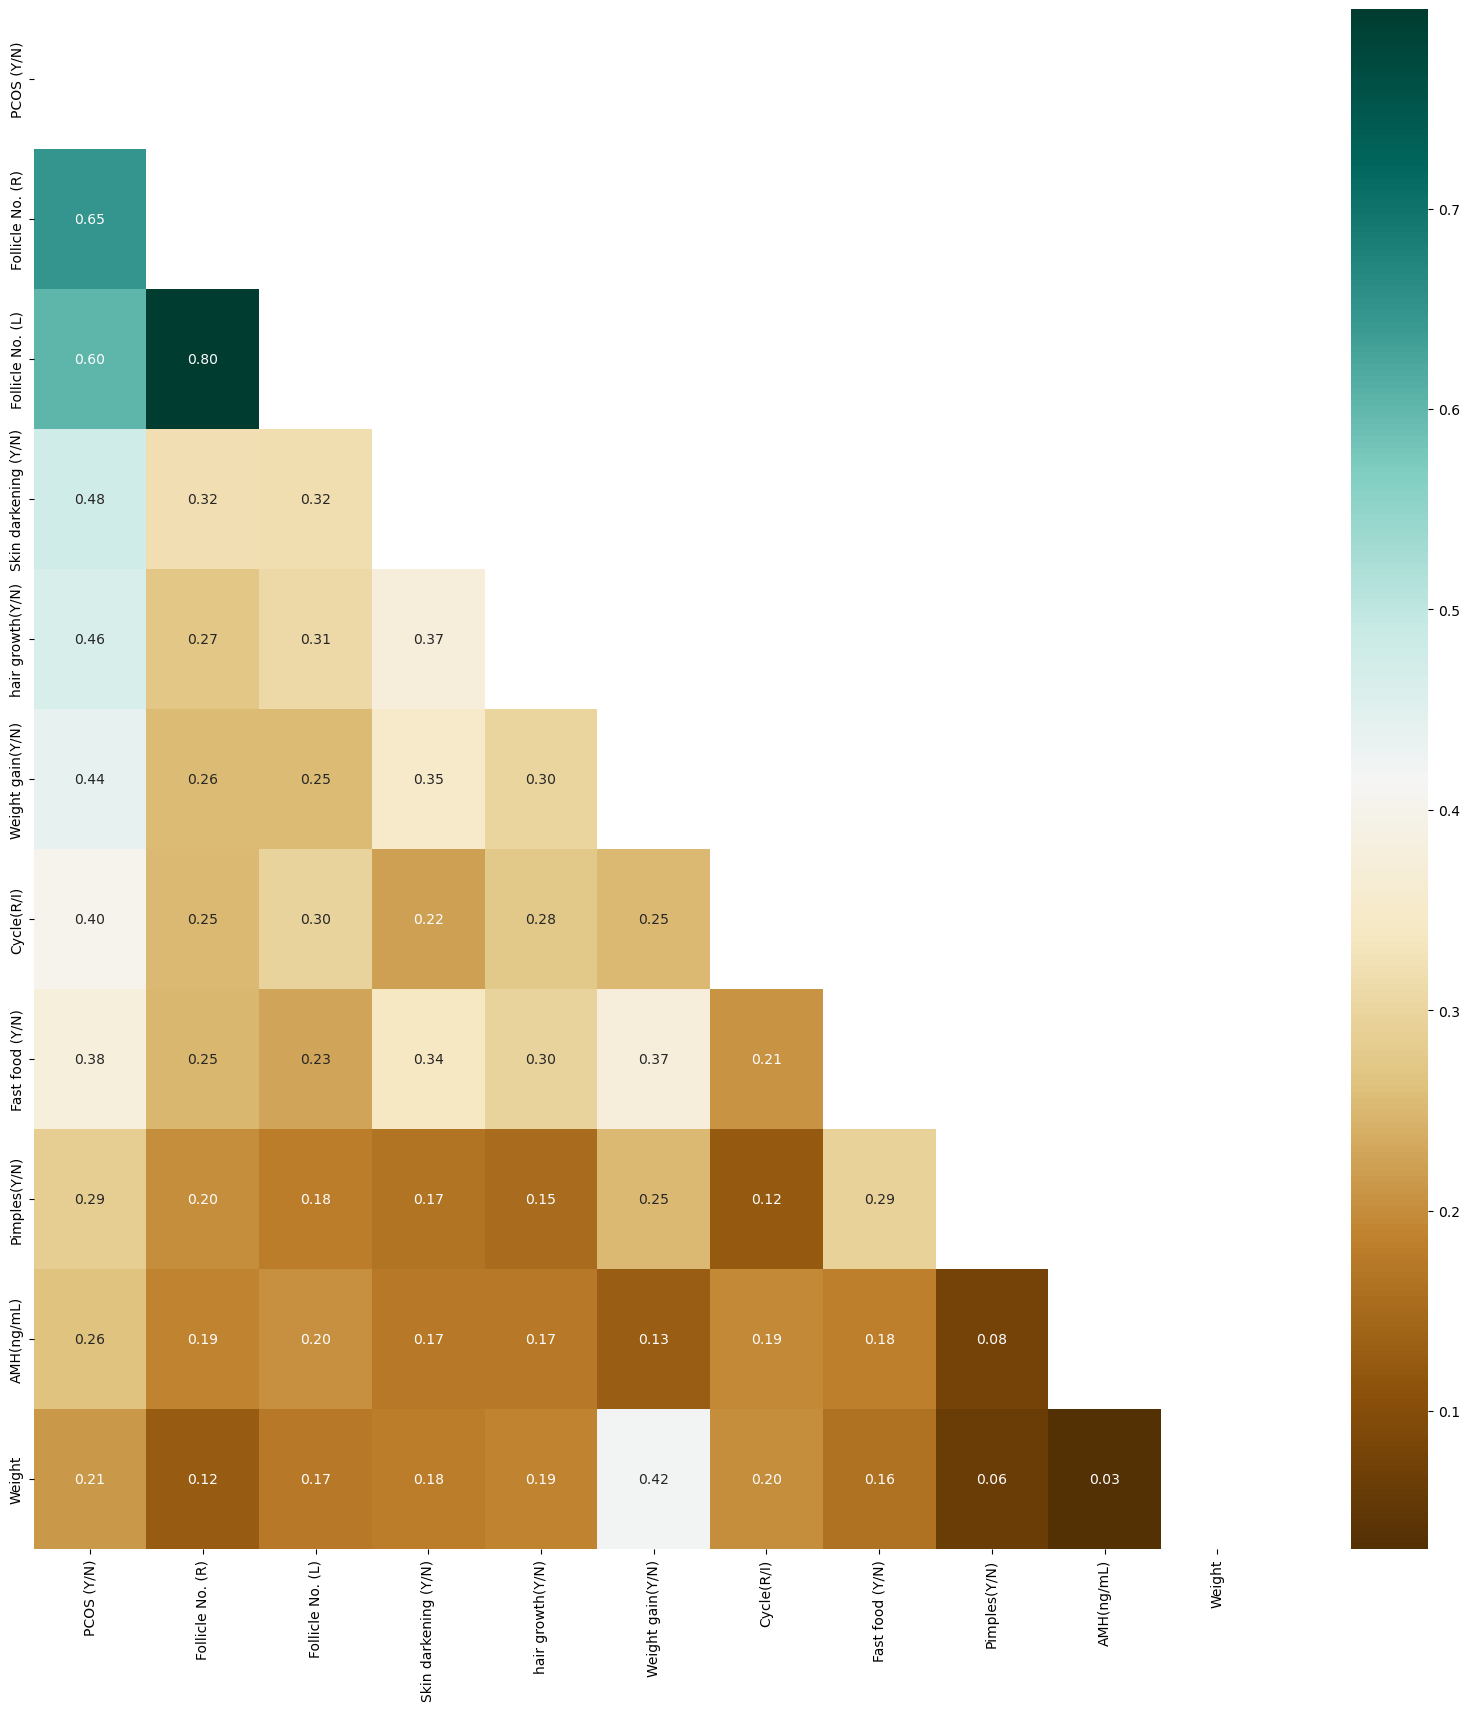

In [36]:
#Plotting correlation heatmap
plt.figure(figsize=(20, 20))
# plotting correlation heatmap
mask = np.triu(np.ones_like(df_new.corr(), dtype=bool))
dataplot = sns.heatmap(df_new.corr(),cmap="BrBG",fmt=".2f", mask=mask, annot=True)
  
# displaying heatmap
plt.show()

In [37]:
df_new.dropna(inplace=True)

/var/folders/vj/c98sfxhn1yjds29gk6q7_q_r0000gn/T/ipykernel_4592/420984286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


## Machine learning Model

In [38]:
#creating X and y variables
X = df_new.drop(['PCOS (Y/N)'],axis=1)
y = df_new['PCOS (Y/N)']


In [39]:
#split the train and test data set
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
#checking the train data set 
x_train

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight
463,1,2,1,1,0,2,1.0,1,10.00,45.0
232,14,16,1,1,0,4,1.0,1,13.60,55.0
448,7,9,1,1,1,4,1.0,0,9.10,71.5
451,18,5,0,0,0,2,0.0,0,0.98,44.0
450,16,20,0,1,1,2,1.0,1,0.91,69.0
...,...,...,...,...,...,...,...,...,...,...
71,6,5,0,0,0,2,0.0,0,2.58,61.0
106,4,6,1,1,1,4,0.0,1,3.90,60.0
271,3,2,0,0,0,2,0.0,1,3.20,55.7
437,12,9,1,0,1,4,1.0,1,8.00,71.0


In [41]:
#instantiating the model
logregression = LogisticRegression()

In [42]:
#fit the model on the training data
logregression.fit(x_train,y_train)

/Users/lucillewanjiku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#generating predictors
y_pred = logregression.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test, y_pred)

In [45]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8981481481481481
Confusion Matrix:
[[75  4]
 [ 7 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        79
           1       0.85      0.76      0.80        29

    accuracy                           0.90       108
   macro avg       0.88      0.85      0.87       108
weighted avg       0.90      0.90      0.90       108



## Hyperparameter Tuning

In [46]:
# Defining the hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

In [47]:
# Initializing the logistic regression model
logistic_regression = LogisticRegression()

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

/Users/lucillewanjiku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/lucillewanjiku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lucillewanjiku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best parameters:  {'C': 1, 'penalty': 'l2'}


/Users/lucillewanjiku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lucillewanjiku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [48]:
# Use the best parameters to train the final model
logistic_regression = grid_search.best_estimator_
logistic_regression.fit(x_train, y_train)

# Evaluate the performance on the test set
accuracy = logistic_regression.score(x_test, y_test)
print("Accuracy on test set: ", accuracy)

Accuracy on test set:  0.8981481481481481


/Users/lucillewanjiku/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Pickling the model

In [49]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(logistic_regression, f)